<a href="https://colab.research.google.com/github/GonzaloPerezGomez/Pytorch/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Computer vision libaries

* torchvision - base domain library for PyTorch computer vision
* torchvision.datasets - Datasets and DataLoading funtions for cumputer vision
* torchvision.models - get pretrained computer vision models
* torchvision.transforms - functions for manipulating your vision data to be suitable for use with ML model
+ torch.utils.data.Dataset - Base dataset class ofr Pytorch
* torch.util.data.DataLoader - Creates a Python iterable over a dataset

In [2]:
# Import PyTorch
import torch
from torch import nn

# Improt torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

## 1. Getting a Dataset

FashionMNIST

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(root="data", # Whare to download data to
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None
                                  )

test_data = datasets.FashionMNIST(root="data", # Whare to download data to
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None
                                  )

100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 343kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.31MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.16MB/s]


In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
 # Color_Channel (black and white), Height, Width
train_data[0][0].shape, train_data[0][1]

(torch.Size([1, 28, 28]), 9)

## 2.3 Visualizing out data

torch.Size([28, 28])

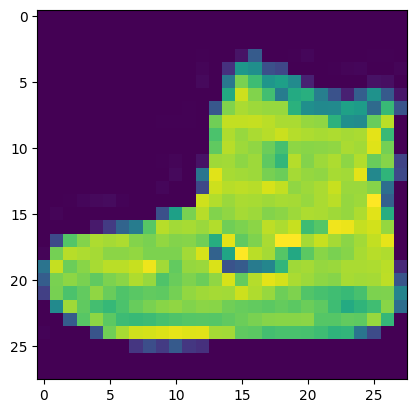

In [21]:
image, label = train_data[0]
plt.imshow(image.transpose(0, 2).transpose(0, 1)) # plt.imshow expects (Height, Width, Color_Cannel)
#plt.imshow(image.squeeze()) becuase the image is in black and white (Color_Channel = 1) we can algo get reed of the extra dimension
image.squeeze().shape

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

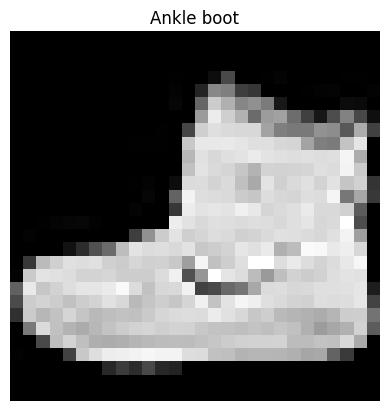

In [22]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 2. Prepare DataLoader

Our data is in the form of PyTorch Datasets. We want to turn it into Python iterable

Also we want to devide it in batches, so we can handle de data in "blocks"

In [24]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [25]:
# Lets check out what we`ve created
print(f"Legth of train_dataloader: {len(train_dataloader)} batches of {train_dataloader.batch_size}")
print(f"Legth of train_dataloader: {len(test_dataloader)} batches of {test_dataloader.batch_size}")


Legth of train_dataloader: 1875 batches of 32
Legth of train_dataloader: 313 batches of 32


In [28]:
# Whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

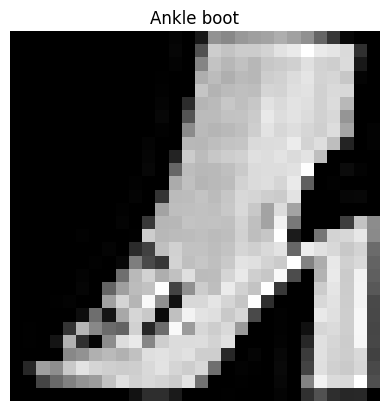

In [32]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

In [33]:
#Create a flatten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [34]:
# Flatten de sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [35]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),

        nn.Linear(in_features=input_shape,
                  out_features=hidden_unit),

        nn.Linear(in_features=hidden_unit,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [36]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_unit=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [37]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)